<a href="https://colab.research.google.com/github/RUPAK-SAI/employee-details-dataset/blob/main/EMPLOYEE_PERFORMANCE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVE 


 THE MAIN OBJECTIVE OF THIS PROJECT IS TO PREDICT THE EMPLOYEE PERFORMANCE.
         BY USING THE GIVEN DATASET WE CAN PREDICT THE PERSONS WHO ARE GIVING THE HIGH PERFORMANCE IN THE PARTICULAR INSTUTION OR COMPANY.










# IMPORTING ALL THE REQUIRED LIBRARIES

In [ ]:
import numpy as np         #it is used to work in domain of linear algebra,fourier transform

In [ ]:
import pandas as pd                      #used for data manipulation 
import matplotlib.pyplot as plt          #used for plotting graphs
import seaborn as sb                     #used for making statistical graphs
from sklearn.linear_model import LogisticRegression        #used for statistical modelling like classification ,modelling ,regression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,roc_auc_score




# **DATASET :**

 IN THIS DATASET WE ARE HAVING THE EMPLOYEES OF 50 MEMBERS OF DIFFERENT DEPARTMENTS AND HAVE DIFFERENT SALARIES.THEY HAVE BEEN WORKED ON MANY DIFFERENT PROJECTS .EACH AND EVERY EMPLOYEE IS DIFFERENTIATED WITH THEIR OWN ATTRIBUTES.
  THERE ARE 11 DIFFERENT ATTRIBUTES THAT DIFFERENTIATES EACH AND EVERY PERSON FROM ONE ANOTHER

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/RUPAK-SAI/employee-details-dataset/main/employee_details_dataset.csv')     #importing dataset

In [ ]:
df.head()    #used to know the  model of dataset

,employee_id,employee_name,email,phone_no,hire_date,job_id,salary,no_of_projects,manager_id,department_id,working_hours
0,501,Rama,rama@gmail.com,7575000470,16-11-2009,111,612022,20,8111,724,234
1,502,Ravi,ravi@gmail.com,7741071474,17-03-2004,222,558253,20,9524,536,264
2,503,Raj,raju@gmail.com,8283951351,16-11-2009,333,882978,20,4711,724,255
3,504,Rajesh,rajesh@gmail.com,9518203146,19-10-2011,444,885884,23,4235,724,250
4,505,Shiva,va@gmail.com,7894632886,13-08-1998,111,773391,19,6982,856,250


In [ ]:
df.columns      #used to know the columns present in the dataset

Index(['employee_id', 'employee_name', 'email', 'phone_no', 'hire_date',
       'job_id', 'salary', 'no_of_projects', 'manager_id', 'department_id',
       'working_hours'],
      dtype='object')

In [ ]:
X = df[['employee_id', 'employee_name', 'email', 'phone_no', 'hire_date',
       'job_id', 'salary', 'no_of_projects', 'manager_id', 'department_id',
       'working_hours']]

# IN THIS DATASET WE ARE HAVING 11 COLUMNS AND 50 ROWS.

In [ ]:
X.shape  #to know the no. of columns and rows present in the dataset

(50, 11)

In [ ]:
df.info()    #to know the summary of the dataset like datatpe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     50 non-null     int64 
 1   employee_name   50 non-null     object
 2   email           50 non-null     object
 3   phone_no        50 non-null     int64 
 4   hire_date       50 non-null     object
 5   job_id          50 non-null     int64 
 6   salary          50 non-null     int64 
 7   no_of_projects  50 non-null     int64 
 8   manager_id      50 non-null     int64 
 9   department_id   50 non-null     int64 
 10  working_hours   50 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 4.4+ KB


In [ ]:
df_numerical = df.select_dtypes(include='int64')   #here to select the attributes of integer datatype

# GRAPHICAL REPRESENTATION OF THE DATA

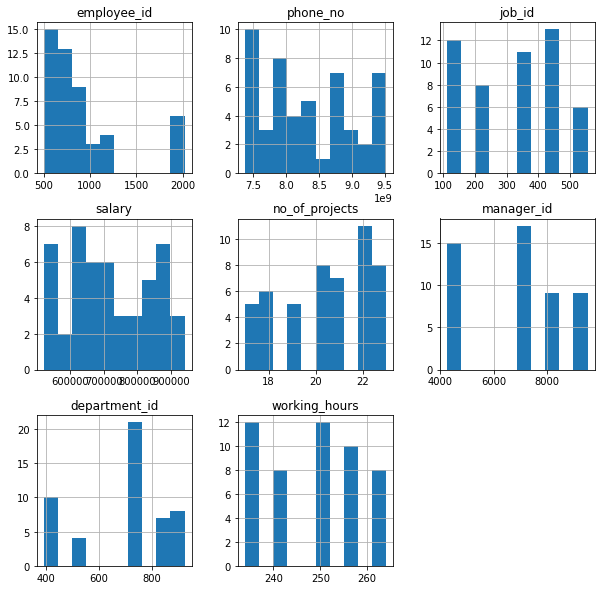

In [ ]:
df_numerical.hist(figsize=(10,10),);         #to draw the graphs for the numeric datatype

In [ ]:
df.employee_id.fillna(0, inplace=True)                   #to fill the default values with 0 when it is true
df.phone_no .fillna(0, inplace=True)  
df.job_id.fillna(0, inplace=True) 
df.salary.fillna(0, inplace=True)   
df.no_of_projects.fillna(0, inplace=True) 
df.manager_id.fillna(0, inplace=True)
df.department_id.fillna(0, inplace=True)
df.working_hours.fillna(0, inplace=True)

# CORRELATION OF THE DATASET

In [ ]:
df.corr()              # to find the corelation for for the given dataset

,employee_id,phone_no,job_id,salary,no_of_projects,manager_id,department_id,working_hours
employee_id,1.000000,-0.059449,0.110719,-0.136309,0.037862,0.027025,0.035483,0.192342
phone_no,-0.059449,1.000000,-0.064429,-0.029391,0.168561,-0.179931,-0.143217,-0.122275
job_id,0.110719,-0.064429,1.000000,0.078642,0.022342,-0.226668,0.108834,0.225209
salary,-0.136309,-0.029391,0.078642,1.000000,-0.025625,0.017393,0.104568,-0.030480
no_of_projects,0.037862,0.168561,0.022342,-0.025625,1.000000,-0.025904,0.026296,0.017813
manager_id,0.027025,-0.179931,-0.226668,0.017393,-0.025904,1.000000,-0.020505,-0.090228
department_id,0.035483,-0.143217,0.108834,0.104568,0.026296,-0.020505,1.000000,-0.181475
working_hours,0.192342,-0.122275,0.225209,-0.030480,0.017813,-0.090228,-0.181475,1.000000


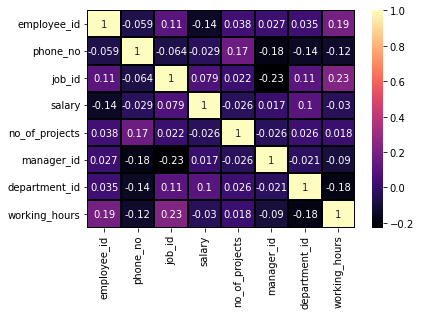

In [ ]:
sb.heatmap(df.corr(),cmap="magma",annot=True,linecolor="black",linewidths=1)    #the heatmap for the coorelation of the dataset with the linecolor black and width is 1

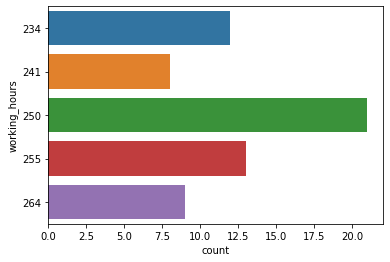

In [ ]:
for column in df.dtypes[df.dtypes=='int64'].index:               #the countplot for the integer datatype 
    sb.countplot(data=df, y='{}'.format(column))

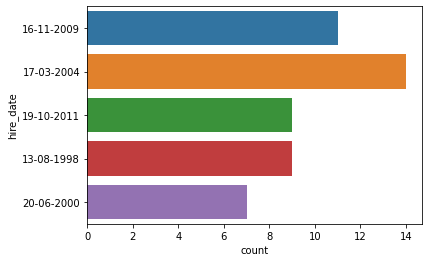

In [ ]:
for column in df.dtypes[df.dtypes=='object'].index:
    sb.countplot(data=df, y='{}'.format(column))        #countplot for the object datatype

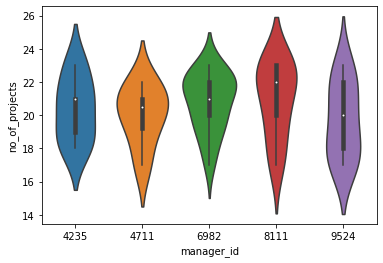

In [ ]:
sb.violinplot(y='no_of_projects', x='manager_id', data=df);         #the violion plot between the no_of_projects and the manager_id

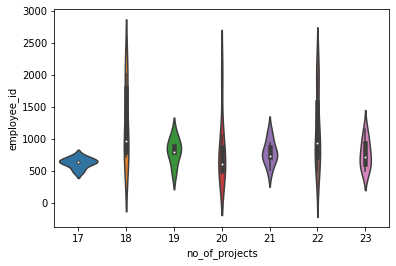

In [ ]:
sb.violinplot(y='employee_id', x='no_of_projects', data=df);       #the vilion plot between the employee_id and no_of_projects

# TRAINING AND TESTING THE DATASET

In [ ]:
y = df['department_id']                            #dependent and independent variables
X = df[['employee_id', 'phone_no','job_id', 'salary', 'no_of_projects', 'manager_id','working_hours']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=525,)   #Splitting the data into train and test set

# USING THE RANDOM FOREST CLASSIFIER

In [ ]:
rfc  = RandomForestClassifier(n_estimators = 51,criterion="entropy")            #function for the random forest classsifer.

In [ ]:
rfc.fit(X_train,y_train)                                                 #fitting the trained dataset  using the random forest classifier algorithm

RandomForestClassifier(criterion='entropy', n_estimators=51)

In [ ]:
y_pred = rfc.predict(X_test)                           #predicting the x-test using the rfc algorithm

In [ ]:
y_pred                          #print the predicted data 

array([724, 856, 391, 724, 724, 724, 856, 856, 925, 856, 724, 391, 724,
       536, 724, 724, 724, 856, 856, 856, 856, 724, 925, 856, 724, 856,
       925, 856, 724, 391, 724, 391, 856, 925, 925])

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix ,classification_report             # the confusion matrix is imported from sklearn.metrics library
cm= confusion_matrix(y_test, y_pred)                                      #the confusion matrix is built in between the y_test and the predicted data 
print(cm)
print(classification_report(y_test, y_pred)) ;                              #classification report is printed 

[[0 0 4 3 0]
 [0 0 1 1 0]
 [1 1 6 5 3]
 [1 0 1 1 1]
 [2 0 1 2 1]]
              precision    recall  f1-score   support

         391       0.00      0.00      0.00         7
         536       0.00      0.00      0.00         2
         724       0.46      0.38      0.41        16
         856       0.08      0.25      0.12         4
         925       0.20      0.17      0.18         6

    accuracy                           0.23        35
   macro avg       0.15      0.16      0.14        35
weighted avg       0.25      0.23      0.23        35



In [ ]:
from sklearn.metrics import mean_absolute_error               #to find the mean absolute error 

mean_absolute_error(y_test, y_pred)                             #the mean absolute error is found between the y_test and predicted data

202.62857142857143

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[0 0 4 3 0]
 [0 0 1 1 0]
 [1 1 6 5 3]
 [1 0 1 1 1]
 [2 0 1 2 1]]


In [ ]:
print('Accuracy:', accuracy_score(y_test, pred))                 #the accuracy score is found between y_test and pericted data
                                                             #the acuuracy score is for the accuracy

Accuracy: 0.22857142857142856


In [ ]:
precision = cm[2][2]/(cm[2][0]+cm[2][2])                #the precision is calculated by the formula tp/(tp+fn)
print('Precision:', precision);                       #where tp =no.of true postive  ; fn = no.of false negatives

Precision: 0.8571428571428571


In [ ]:
recall = cm[2][2]/(cm[0][2]+cm[2][2])                     #the recall score is calculated as same as the precision
print('Recall:', recall);  

Recall: 0.6


In [ ]:
F1 = 2*(precision*recall)/(precision+recall)                      #the f1 score is calculated using the precisions and the recall scores
print('F1:', F1)

F1: 0.7058823529411764


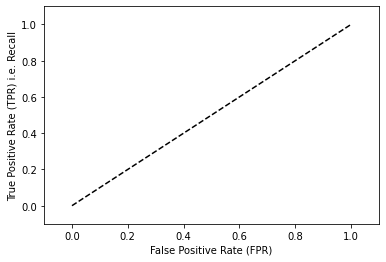

In [ ]:
  # PLOT ROC                                        
plt.plot([0,1],[0,1],'k--')               #  ROC curve- receiver operating characteristic curve
                                          #  it is  showing the performance of a classification model at all classification thresholds
                                               # it is plotted between the parameters true postive rate and false postive rate
plt.xlim([-0.1,1.1])                      #the intervals on the x-axis
plt.ylim([-0.1,1.1])                    #the intervals on the y-axis
plt.ylabel('True Positive Rate (TPR) i.e. Recall')       # y-axis representation
plt.xlabel('False Positive Rate (FPR)')             # x-axis representation
plt.show()                   #it shows the curve for the given parameters

# USING THE LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression(random_state=0)         #logistic regression is the hypothesis of the regression values that limits the costfunction between 0 and 1

In [ ]:
lr.fit(X_train,y_train)               #fitting the data using the logistic regression algorithm

LogisticRegression(random_state=0)

In [ ]:
b_pred = lr.predict(X_test)               #predicting the X-test values using the logistic regression

In [ ]:
b_pred                    #printing the predicted values in the form of array 

array([724, 724, 724, 724, 724, 724, 724, 724, 724, 724, 724, 724, 724,
       724, 724, 724, 724, 724, 724, 724, 724, 724, 724, 724, 724, 724,
       724, 724, 724, 724, 724, 724, 724, 724, 724])

In [ ]:
#Creating the Confusion matrix 
from sklearn.metrics import confusion_matrix ,classification_report                                
print(classification_report(y_test, b_pred)) ;           #gettting the classification report 


              precision    recall  f1-score   support

         391       0.00      0.00      0.00         7
         536       0.00      0.00      0.00         2
         724       0.46      1.00      0.63        16
         856       0.00      0.00      0.00         4
         925       0.00      0.00      0.00         6

    accuracy                           0.46        35
   macro avg       0.09      0.20      0.13        35
weighted avg       0.21      0.46      0.29        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, b_pred)                       #getting the meanabsolute error between the y_test and b_pred 

126.88571428571429

In [ ]:
lr.predict_proba(X_test)                        #the predicted values of the x_test using the logistic regression

array([[0.19921894, 0.12365831, 0.35086833, 0.20767798, 0.11857644],
       [0.20130104, 0.13345536, 0.32788206, 0.208647  , 0.12871455],
       [0.20051346, 0.12935876, 0.33733796, 0.20832524, 0.12446458],
       [0.19940463, 0.12441585, 0.34904456, 0.20777775, 0.1193572 ],
       [0.19784178, 0.11850743, 0.36348532, 0.20688375, 0.11328172],
       [0.19893945, 0.12254948, 0.35355233, 0.20752417, 0.11743458],
       [0.20160625, 0.13522957, 0.32385379, 0.20875041, 0.13055999],
       [0.19920411, 0.12359853, 0.35101258, 0.20766992, 0.11851486],
       [0.20094648, 0.13153549, 0.33228638, 0.20851078, 0.12672087],
       [0.19925931, 0.1238215 , 0.35047476, 0.20769984, 0.11874459],
       [0.19949053, 0.12477227, 0.34818925, 0.20782322, 0.11972473],
       [0.20090534, 0.13132132, 0.33278066, 0.208494  , 0.12649868],
       [0.19925683, 0.12381149, 0.3504989 , 0.2076985 , 0.11873428],
       [0.2013152 , 0.13353499, 0.3277004 , 0.2086521 , 0.12879732],
       [0.19828811, 0.12009607, 0.

In [ ]:
pred1 = lr.predict(X_test)

In [ ]:
cm_using_lr = confusion_matrix(y_test, pred1)
print(cm_using_lr)                                     #print the confusion matrix 

[[ 0  0  7  0  0]
 [ 0  0  2  0  0]
 [ 0  0 16  0  0]
 [ 0  0  4  0  0]
 [ 0  0  6  0  0]]


In [ ]:
print('Accuracy:', accuracy_score(y_test, pred1))                #finding the accuracy 

Accuracy: 0.45714285714285713


In [ ]:
precision1 = cm[2][2]/(cm[2][0]+cm[2][2])                             #finding the precision for the confusion matrix
print('Precision:', precision1);

Precision: 0.8571428571428571


In [ ]:
recall1 = cm[2][2]/(cm[0][2]+cm[2][2])
print('Recall:', recall1);                            #the recall_score  is calculated for the confusion matrix

Recall: 0.6


In [ ]:
F1_1 = 2*(precision1*recall1)/(precision1+recall1)      #The f1 score is calculated using the above presision and recall values
print('F1:', F1_1)

F1: 0.7058823529411764


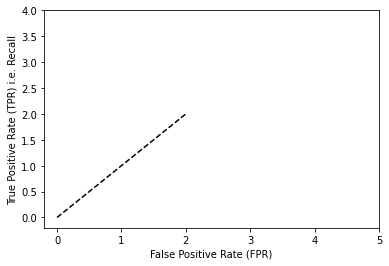

In [ ]:
  # PLOT ROC
plt.plot([0,2],[0,2],'k--')                     #the roc curve is plotted between the parameeters postive rate and the false postive rate 
plt.xlim([-0.2,5])
plt.ylim([-0.2,4])
plt.ylabel('True Positive Rate (TPR) i.e. Recall')
plt.xlabel('False Positive Rate (FPR)')
plt.show()                           #printes the plotted curve

# USING THE GRID SEARCH CV

In [ ]:
from sklearn.preprocessing import OneHotEncoder ,StandardScaler         #the onehot encoder is used to show the data more expressive   
ohe = OneHotEncoder(sparse = False)

The StandardScaler removes the mean and scales each attribute to unit variance. This operation is performed feature-wise in an independent way.

In [ ]:
X_train_cat = ohe.fit_transform(X_train[["employee_id","salary"]])              #fitting and transforming the x-train including the employee_id and salary

In [ ]:
X_train_cat[:11]                                          #printing the catogorial values till the index 11

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
ss = StandardScaler()                  #calling the standard scalar function

In [ ]:
num_col = ['employee_id', 'phone_no', 'job_id', 'salary', 'no_of_projects', 'manager_id','working_hours']        #assigning the numerical columns

In [ ]:
X_train_num = ss.fit_transform(X_train[num_col])         #fitting the satndard scalar along with the numerical columns

In [ ]:
X_train_num[:5]

array([[-0.77672731,  1.68537532, -1.42516248,  0.70167274,  0.25628821,
         0.04560952, -1.16516275],
       [-0.20937399, -1.34838549, -1.42516248, -0.32430696, -1.94046787,
         1.38957478, -1.16516275],
       [-0.20130735, -0.73876287,  0.86527722, -0.93245327,  0.80547723,
         1.38957478,  1.4050492 ],
       [ 3.27810115, -0.80591138,  0.10179732,  0.23009728, -1.39127885,
        -1.40674004,  0.63398561],
       [-0.78479394,  0.04318995,  0.86527722,  1.76914492, -0.29290081,
         0.6425162 , -1.16516275]])

In [ ]:
import numpy as np       #used to working in the domain of linear algebra ,fourier transform and matrices

In [ ]:
X_train_out = pd.DataFrame(np.concatenate([X_train_cat,X_train_num],axis =1))   #used to concatenate the X-train_cat and X-train_num and  assign into a new variable

In [ ]:
X_train_out.head()         #print the dataframe head where head will print the starting rows in the dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.776727,1.685375,-1.425162,0.701673,0.256288,0.045610,-1.165163
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.209374,-1.348385,-1.425162,-0.324307,-1.940468,1.389575,-1.165163
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.201307,-0.738763,0.865277,-0.932453,0.805477,1.389575,1.405049
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278101,-0.805911,0.101797,0.230097,-1.391279,-1.406740,0.633986
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.784794,0.043190,0.865277,1.769145,-0.292901,0.642516,-1.165163


In [ ]:
X_test_cat = ohe.transform(X_train[["employee_id","salary"]])  #transform the xtrain by including the employee_id ,salary

In [ ]:
X_test_num = ss.transform(X_train[num_col])       #transform the numbercolumns into the standard scalar

In [ ]:
X_test_out = pd.DataFrame(np.concatenate([X_test_cat,X_test_num],axis =1))       #concatenate  the x_test_cat,x_test_num and make a dataframe and assign into new variable

In [ ]:
X_test_out.head()         #print the head of the x_test_out dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.776727,1.685375,-1.425162,0.701673,0.256288,0.045610,-1.165163
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.209374,-1.348385,-1.425162,-0.324307,-1.940468,1.389575,-1.165163
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.201307,-0.738763,0.865277,-0.932453,0.805477,1.389575,1.405049
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.278101,-0.805911,0.101797,0.230097,-1.391279,-1.406740,0.633986
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.784794,0.043190,0.865277,1.769145,-0.292901,0.642516,-1.165163


In [ ]:
params = {'n_estimators':[10,20,30], 'max_depth':[2,3,4]}            #crating a parameters like n_estimators and max_depth of the tree

In [ ]:
gs = GridSearchCV(estimator = rfc ,param_grid = params ,cv =5 , n_jobs =-1)    #implementing the grid search cv by sending parameters into it

In [ ]:
gs.fit(X_train,y_train)                        #fitting the model using the grid search cv algorithm

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=51),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'n_estimators': [10, 20, 30]})

In [ ]:
gs.cv_results_                             #getting the cv results using the gridsearch algorithm declared function

{'mean_fit_time': array([0.02503347, 0.04688792, 0.07119823, 0.0251029 , 0.04654441,
        0.06691036, 0.02798233, 0.04660544, 0.06231656]),
 'mean_score_time': array([0.00572495, 0.00673022, 0.00911198, 0.00496407, 0.00689378,
        0.00827718, 0.00522947, 0.00831661, 0.00756645]),
 'mean_test_score': array([0.13333333, 0.2       , 0.2       , 0.06666667, 0.33333333,
        0.26666667, 0.2       , 0.26666667, 0.13333333]),
 'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 20, 30, 10, 20, 30, 10, 20, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'n_estimators': 10},
  {'max_depth': 2, 'n_estimators': 20},
  {'max_depth': 2, 

In [ ]:
pd.DataFrame(gs.cv_results_)                #creating a dataframe for the cv results and printing it in a tabular format

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025033,0.001724,0.005725,0.001688,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.333333,0.000000,0.333333,0.000000,0.000000,0.133333,0.163299,7
1,0.046888,0.001438,0.006730,0.000084,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.333333,0.000000,0.666667,0.000000,0.000000,0.200000,0.266667,4
2,0.071198,0.003847,0.009112,0.001354,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.000000,0.333333,0.666667,0.000000,0.000000,0.200000,0.266667,4
3,0.025103,0.001261,0.004964,0.000077,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.000000,0.000000,0.000000,0.333333,0.000000,0.066667,0.133333,9
4,0.046544,0.002280,0.006894,0.000254,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.333333,0.333333,0.666667,0.333333,0.000000,0.333333,0.210819,1
5,0.066910,0.002039,0.008277,0.000116,3,30,"{'max_depth': 3, 'n_estimators': 30}",0.666667,0.000000,0.333333,0.333333,0.000000,0.266667,0.249444,2
6,0.027982,0.004416,0.005229,0.000540,4,10,"{'max_depth': 4, 'n_estimators': 10}",0.333333,0.000000,0.666667,0.000000,0.000000,0.200000,0.266667,4
7,0.046605,0.002714,0.008317,0.001964,4,20,"{'max_depth': 4, 'n_estimators': 20}",0.333333,0.000000,0.333333,0.333333,0.333333,0.266667,0.133333,2
8,0.062317,0.006640,0.007566,0.001409,4,30,"{'max_depth': 4, 'n_estimators': 30}",0.000000,0.000000,0.666667,0.000000,0.000000,0.133333,0.266667,7


In [ ]:
gs.best_params_                    #getting best solution from the dataframe of the cv resuls   based on the rank test

{'max_depth': 3, 'n_estimators': 20}

In [ ]:
gb_pred = gs.predict(X_test)    #predicting the xtest values and assinging it into  a new variable


In [ ]:
gb_pred            #printing the array of predicted values

array([724, 856, 724, 724, 724, 724, 925, 724, 925, 856, 925, 724, 724,
       536, 724, 724, 724, 856, 391, 856, 391, 724, 536, 925, 724, 391,
       724, 856, 724, 536, 724, 724, 856, 724, 925])

In [ ]:
#Creating the Confusion matrix 

cm_gs= confusion_matrix(y_test, gb_pred)        #creating a confusion matrix
print(cm_gs)                                        # printing the confusion matrix
print(classification_report(y_test, gb_pred)) ;          #printing the classification report for the dataset

[[2 0 3 1 1]
 [0 0 1 0 1]
 [1 2 8 3 2]
 [0 0 4 0 0]
 [0 1 2 2 1]]
              precision    recall  f1-score   support

         391       0.67      0.29      0.40         7
         536       0.00      0.00      0.00         2
         724       0.44      0.50      0.47        16
         856       0.00      0.00      0.00         4
         925       0.20      0.17      0.18         6

    accuracy                           0.31        35
   macro avg       0.26      0.19      0.21        35
weighted avg       0.37      0.31      0.33        35



In [ ]:

mean_absolute_error(y_test, gb_pred)            #getting the mean absolute error for the dataset in the gridsearch search cv algorithm block

158.25714285714287

In [ ]:
gs.predict_proba(X_test)                 #predicting the probability of the x-test

array([[0.225     , 0.15416667, 0.38333333, 0.1375    , 0.1       ],
       [0.2       , 0.0625    , 0.3075    , 0.38      , 0.05      ],
       [0.26      , 0.075     , 0.435     , 0.18      , 0.05      ],
       [0.21      , 0.1625    , 0.29416667, 0.23333333, 0.1       ],
       [0.125     , 0.0625    , 0.595     , 0.2175    , 0.        ],
       [0.14166667, 0.01666667, 0.585     , 0.20666667, 0.05      ],
       [0.025     , 0.19583333, 0.15416667, 0.25      , 0.375     ],
       [0.025     , 0.1375    , 0.4575    , 0.28      , 0.1       ],
       [0.1       , 0.28333333, 0.15      , 0.        , 0.46666667],
       [0.2       , 0.24166667, 0.12083333, 0.3375    , 0.1       ],
       [0.06      , 0.2       , 0.2225    , 0.2175    , 0.3       ],
       [0.20166667, 0.1125    , 0.5       , 0.16916667, 0.01666667],
       [0.225     , 0.05416667, 0.47083333, 0.25      , 0.        ],
       [0.125     , 0.4125    , 0.1375    , 0.        , 0.325     ],
       [0.275     , 0.02916667, 0.

In [ ]:
pred2 = gs.predict(X_test) #peredicting the x-test

In [ ]:
cm_using_gs = confusion_matrix(y_test, pred2)      #creting a confusion matrix 
print(cm_using_gs)                               #printing the confusion matrix

[[2 0 3 1 1]
 [0 0 1 0 1]
 [1 2 8 3 2]
 [0 0 4 0 0]
 [0 1 2 2 1]]


In [ ]:
print('Accuracy:', accuracy_score(y_test, pred2))            #printing the accuracy_score for the ytest and predition ava;ues

Accuracy: 0.3142857142857143


In [ ]:
precision2 = cm[3][3]/(cm[2][0]+cm[3][3])           #precision of the above confusion  matrix
print('Precision:', precision2);

Precision: 0.5


In [ ]:
recall2 = cm[3][3]/(cm[0][2]+cm[3][3])                  #the recall score for the above confusion matrix 
print('Recall:', recall2);

Recall: 0.2


In [ ]:
F1_2 = 2*(precision2*recall2)/(precision2+recall2)             #the f1_score for the above confusion matrix based on the precision and the recall values
print('F1:', F1_2)

F1: 0.28571428571428575


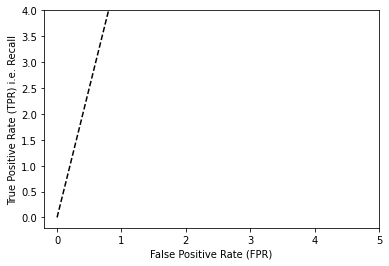

In [ ]:
 # PLOT ROC                                              
plt.plot([0,0.8],[0,4],'k--')                   
plt.xlim([-0.2,5])                           #the intervals of the x axis is between -0.2 and 5
plt.ylim([-0.2,4])                                 #the intervals for the y-axis is between -0.2 and 4
plt.ylabel('True Positive Rate (TPR) i.e. Recall')           #the y axis is represented as recall
plt.xlabel('False Positive Rate (FPR)')                          # the x axis is represented as the false postive rate
plt.show()


# PRINTING THE DECISION TREE FOR DATASET

Decision Trees  are  supervised learning method  that are used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [ ]:
from sklearn.tree import DecisionTreeClassifier                   #importing the package decision trees classifier from the sklearn          

In [ ]:
model = DecisionTreeClassifier(max_depth= 5)                     #assigning the functiona decision  tress to new variable

In [ ]:
model                                                            #calling the assigned variable

DecisionTreeClassifier(max_depth=5)

In [ ]:
model.fit(X_train, y_train)                                     #fitting the model and we get the alogorithm used to fit the model

DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn.tree import plot_tree                       #importing the package plot tree to get the tree diagram for the given data

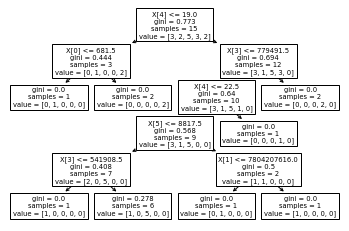

In [ ]:
plot_tree(model);                                                    #printing the  tree  with the level of 5

## The values of the dataset using the random forest classifier   
      mean absolute error = 202.62857142857143
      Accuracy: 0.22857142857142856
      Precision: 0.8571428571428571
      Recall: 0.6
      F1: 0.7058823529411764

## The values of the datast using the logistic regression classifier
       mean absolute error = 126.88571428571429
       Accuracy: 0.45714285714285713
       Precision: 0.8571428571428571
       Recall: 0.6
       F1: 0.7058823529411764

## The values of the dataset using the grid search cv 
                  mean absolute error =158.25714285714287
                  Accuracy: 0.3142857142857143
                  Precision: 0.5
                  Recall: 0.2
                  F1: 0.28571428571428575

## FINALLY THE DECISION TREE IS CONSTRUCTED AND THE PRCISION AND ACCURACY IS HIGH FOR THE EMPLOYMENT DATASET BY USING THE LOGISTIC REGRESSION# 